In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

In [2]:
data=pd.read_csv("carsdata.csv")
data.head()

,Model,Engine,SC/Turbo,Weight,Fuel Economy,Fast
0,M1,Small,No,Average,Good,No
1,M2,Small,No,Light,Average,No
2,M3,Small,Yes,Average,Bad,Yes
3,M4,Medium,No,Heavy,Bad,Yes
4,M5,Large,No,Average,Bad,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Model         15 non-null     object
 1   Engine        15 non-null     object
 2   SC/Turbo      15 non-null     object
 3   Weight        15 non-null     object
 4   Fuel Economy  15 non-null     object
 5   Fast          15 non-null     object
dtypes: object(6)
memory usage: 848.0+ bytes


# DataPreprocessing 

In [4]:
df=data
df=df.drop(['Model'],axis=1)

In [5]:
df.Engine=pd.Categorical(df.Engine)
df['EngineCode']=df.Engine.cat.codes

df['SC/Turbo']=pd.Categorical(df['SC/Turbo'])
df['SC/Turbo_code']=df['SC/Turbo'].cat.codes

df.Weight=pd.Categorical(df.Weight)
df['weight_Code']=df.Weight.cat.codes

df['Fuel Economy']=pd.Categorical(df['Fuel Economy'])
df['Fuel_Economy_code']=df['Fuel Economy'].cat.codes

df.Fast=pd.Categorical(df.Fast)
df['Fast_code']=df.Fast.cat.codes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Engine             15 non-null     category
 1   SC/Turbo           15 non-null     category
 2   Weight             15 non-null     category
 3   Fuel Economy       15 non-null     category
 4   Fast               15 non-null     category
 5   EngineCode         15 non-null     int8    
 6   SC/Turbo_code      15 non-null     int8    
 7   weight_Code        15 non-null     int8    
 8   Fuel_Economy_code  15 non-null     int8    
 9   Fast_code          15 non-null     int8    
dtypes: category(5), int8(5)
memory usage: 782.0 bytes


In [7]:
df.columns

Index(['Engine', 'SC/Turbo', 'Weight', 'Fuel Economy', 'Fast', 'EngineCode',
       'SC/Turbo_code', 'weight_Code', 'Fuel_Economy_code', 'Fast_code'],
      dtype='object')

In [8]:
df_new=df.drop(['Engine', 'SC/Turbo', 'Weight', 'Fuel Economy', 'Fast'],axis=1)
df_new.head()

,EngineCode,SC/Turbo_code,weight_Code,Fuel_Economy_code,Fast_code
0,2,0,0,2,0
1,2,0,2,0,0
2,2,1,0,1,1
3,1,0,1,1,1
4,0,0,0,1,1


# Train and Test data for the model

In [9]:
X=df_new.drop(['Fast_code'],axis=1)
Y=df['Fast_code']
X.shape,Y.shape

((15, 4), (15,))

In [10]:
df_test=df_new.sample(n=5)
x_test=df_test.drop(['Fast_code'],axis=1)
y_test=df_test['Fast_code']

In [11]:
model_tree=tree.DecisionTreeClassifier()
model_tree.fit(X,Y)

DecisionTreeClassifier()

In [12]:
y_pred=model_tree.predict(x_test)

In [13]:
print(y_pred)
y_test

[0 0 0 0 1]


3     1
5     0
13    0
11    0
8     1
Name: Fast_code, dtype: int8

# Metrics Evaluation

In [14]:
wrong_pred=(y_test != y_pred).sum()
print("Total Wrongly predicted = {}".format(wrong_pred))

accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of this model = {:.3f}".format(accuracy))

Total Wrongly predicted = 1
Accuracy of this model = 0.800


# Graphical view of the tree 

In [15]:
ddata=tree.export_graphviz(model_tree,out_file=None,filled=True,rounded=True,
                          feature_names=['Engine','SC/Turbo','weight','Fuel Economy'],
                          class_names=['YES','NO'])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

InvocationException: GraphViz's executables not found

In [16]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

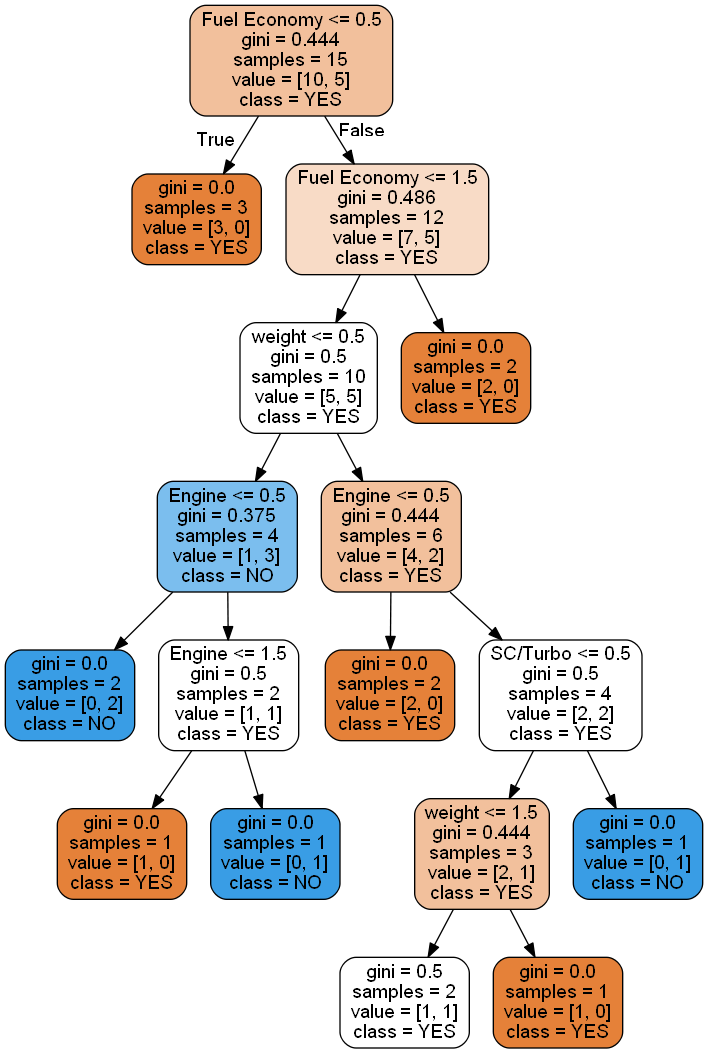

In [17]:
ddata=tree.export_graphviz(model_tree,out_file=None,filled=True,rounded=True,
                          feature_names=['Engine','SC/Turbo','weight','Fuel Economy'],
                          class_names=['YES','NO'])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

# Save Model

In [37]:
import pickle 
  
# Save the trained model as a pickle string. 
model_file="model.bkp"
pickle.dump(model_tree, open(model_file, 'wb')) 

#loading the model
loaded_model=pickle.load(open(model_file, 'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 0, 1], dtype=int8)

array([0, 0, 0, 0, 1], dtype=int8)